# Praca domowa 2 - Maciej Paczóski

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
allegro = pd.read_csv('allegro-api-transactions.csv', sep = ',')

In [3]:
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


## 1) Kodowanie zmiennych kategorycznych

####  Target encoding

In [4]:
len(allegro.it_location.unique())

10056

W przypadku gdy kodowana kolumna przyjmuje dużo różnych wartości one-hot encoding potrzebuje nieporównywalnie więcej pamięci niż target encoding.

In [5]:
import category_encoders as ce

targetEncoder = ce.TargetEncoder()
oneHotEncoder = ce.OneHotEncoder()
ordinalEncoder = ce.OrdinalEncoder()
basenEncoder = ce.BaseNEncoder(base=2)

hashingEncoder = ce.HashingEncoder()

In [6]:
targetEncoder.fit(allegro.it_location,allegro.price)
it_location_encoded = targetEncoder.transform(allegro.it_location)
it_location_encoded['val'] = allegro.it_location
it_location_encoded.head()

,it_location,val
0,85.423398,Warszawa
1,85.423398,Warszawa
2,61.990914,Leszno
3,35.433365,Wola Krzysztoporska
4,117.191956,BIAŁYSTOK


####  One-hot encoding

In [7]:
oneHotEncoder.fit(allegro.main_category,allegro.price)
main_category_oneHot = oneHotEncoder.transform(allegro.main_category)
main_category_oneHot['val'] = allegro.main_category
main_category_oneHot.head()

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27,val
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Komputery
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Odzież, Obuwie, Dodatki"
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dom i Ogród
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Książki i Komiksy
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Odzież, Obuwie, Dodatki"


####  Base N encoding, base = 2 więc binary encoding

In [8]:
basenEncoder.fit(allegro.main_category,allegro.price)
main_category_basen = basenEncoder.transform(allegro.main_category)
main_category_basen['val'] = allegro.main_category
main_category_basen.head()

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,val
0,0,0,0,0,0,1,Komputery
1,0,0,0,0,1,0,"Odzież, Obuwie, Dodatki"
2,0,0,0,0,1,1,Dom i Ogród
3,0,0,0,1,0,0,Książki i Komiksy
4,0,0,0,0,1,0,"Odzież, Obuwie, Dodatki"


####  Ordinal encoding

In [9]:
ordinalEncoder.fit(allegro.main_category,allegro.price)
main_category_ordinal = ordinalEncoder.transform(allegro.main_category)
main_category_ordinal['val'] = allegro.main_category
main_category_ordinal.head()

,main_category,val
0,1,Komputery
1,2,"Odzież, Obuwie, Dodatki"
2,3,Dom i Ogród
3,4,Książki i Komiksy
4,2,"Odzież, Obuwie, Dodatki"


## 2) Uzupełnianie braków

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

from sklearn.metrics import mean_squared_error

In [11]:
short = allegro.loc[:,['price', 'it_seller_rating', 'it_quantity']]
short_cut = short.copy()
short_cut['it_seller_rating'] = short['it_seller_rating'].sample(frac=0.9)

In [12]:
data_na_perc = short_cut.count(axis = 0) / (short_cut.count(axis = 0) + short_cut.isnull().sum(axis = 0))
all_data = pd.DataFrame(data_na_perc).reset_index()
all_data.columns = ['variable','non_missing_proc']
all_data

,variable,non_missing_proc
0,price,1.0
1,it_seller_rating,0.9
2,it_quantity,1.0


Porównane wartości imputowane z oryginalnymi (miara RMSE), z użyciem Multivariate feature imputation.

In [13]:
x = imp.fit_transform(short_cut)
x = pd.DataFrame(x, columns= ['price', 'it_seller_rating', 'it_quantity'])
mean_squared_error(short, x, squared = False )

6757.501957527911

In [14]:
errors1=[]
for z in range(10):
    short_cut = short.copy()
    short_cut['it_seller_rating'] = short['it_seller_rating'].sample(frac=0.9)
    x = imp.fit_transform(short_cut)
    x = pd.DataFrame(x, columns= ['price', 'it_seller_rating', 'it_quantity'])
    errors1.append(mean_squared_error(short, x, squared = False ))
errors1

[6662.535889061517,
 6796.75334463567,
 6750.897686299008,
 6669.48423644212,
 6725.67482177617,
 6733.686137404595,
 6654.317983119022,
 6698.066270908439,
 6764.564143094894,
 6589.941295887478]

Odchylenie standardowe dla eksperymentu powtórzonego 10 razy.

In [15]:
np.std(errors1)

58.51637341585314

Analogiczna analiza gdy oprócz losowego usuwania 10% wartości z kolumny it_seller_rating usuniemy także losowo 10% ze zmiennej it_quantity.

In [16]:
errors2=[]
for z in range(10):
    short_cut = short.copy()
    short_cut['it_seller_rating'] = short['it_seller_rating'].sample(frac=0.9)
    short_cut['it_quantity'] = short['it_quantity'].sample(frac=0.9)
    x = imp.fit_transform(short_cut)
    x = pd.DataFrame(x, columns= ['price', 'it_seller_rating', 'it_quantity'])
    errors2.append(mean_squared_error(short, x, squared = False ))
errors2

[7892.862543338636,
 7862.418470252663,
 8006.4267122870215,
 7934.39571996186,
 8051.407307827203,
 8019.7512224756865,
 7896.714747717103,
 8046.910922068721,
 7981.654562390871,
 7974.56962225434]

In [17]:
np.std(errors2)

63.68315478398922

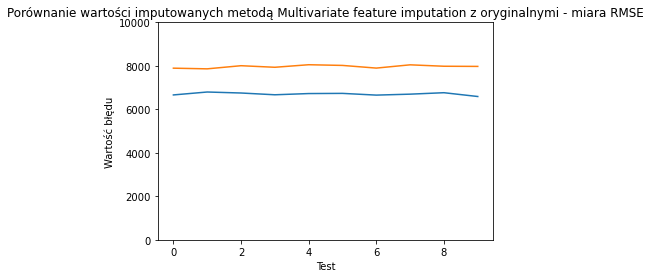

In [18]:
plt.plot(errors1)
plt.plot(errors2)
plt.ylim(0, 10000)
plt.xlabel("Test")
plt.ylabel("Wartość błędu")
plt.title("Porównanie wartości imputowanych metodą Multivariate feature imputation z oryginalnymi - miara RMSE")
plt.show()

### Wnioski

Jak można się było spodziewać wartości błędu są większę gdy braki są w dwóch kolumnach.